# Extract and Visualize Individual Heartbeats

This example shows how to use NeuroKit to extract and visualize the QRS complexes (individual heartbeats) from an electrocardiogram (ECG).


In [17]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images

## Extract the cleaned ECG signal

In this example, we will use a simulated ECG signal. However, you can use any of your signal (for instance, extracted from the dataframe using the [read_acqknowledge()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.read_acqknowledge>).


In [19]:
# Simulate 30 seconds of ECG Signal (recorded at 250 samples / second)
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=250)

Once you have a raw ECG signal in the shape of a vector (i.e., a one-dimensional array), or a list, you can use [ecg_process()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_process>) to process it.


*Note: It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to have a time reference.*

In [20]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=250)

This function outputs two elements, a *dataframe* containing the different signals (raw, cleaned, etc.) and a *dictionary* containing various additional information (peaks location, ...).

## Extract R-peaks location


The processing function does two important things for our purpose: 1) it cleans the signal and 2) it detects the location of the R-peaks. Let's extract these from the output.


In [21]:
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

Great. We can visualize the R-peaks location in the signal to make sure it got detected correctly by marking their location in the signal.

<IPython.core.display.Javascript object>


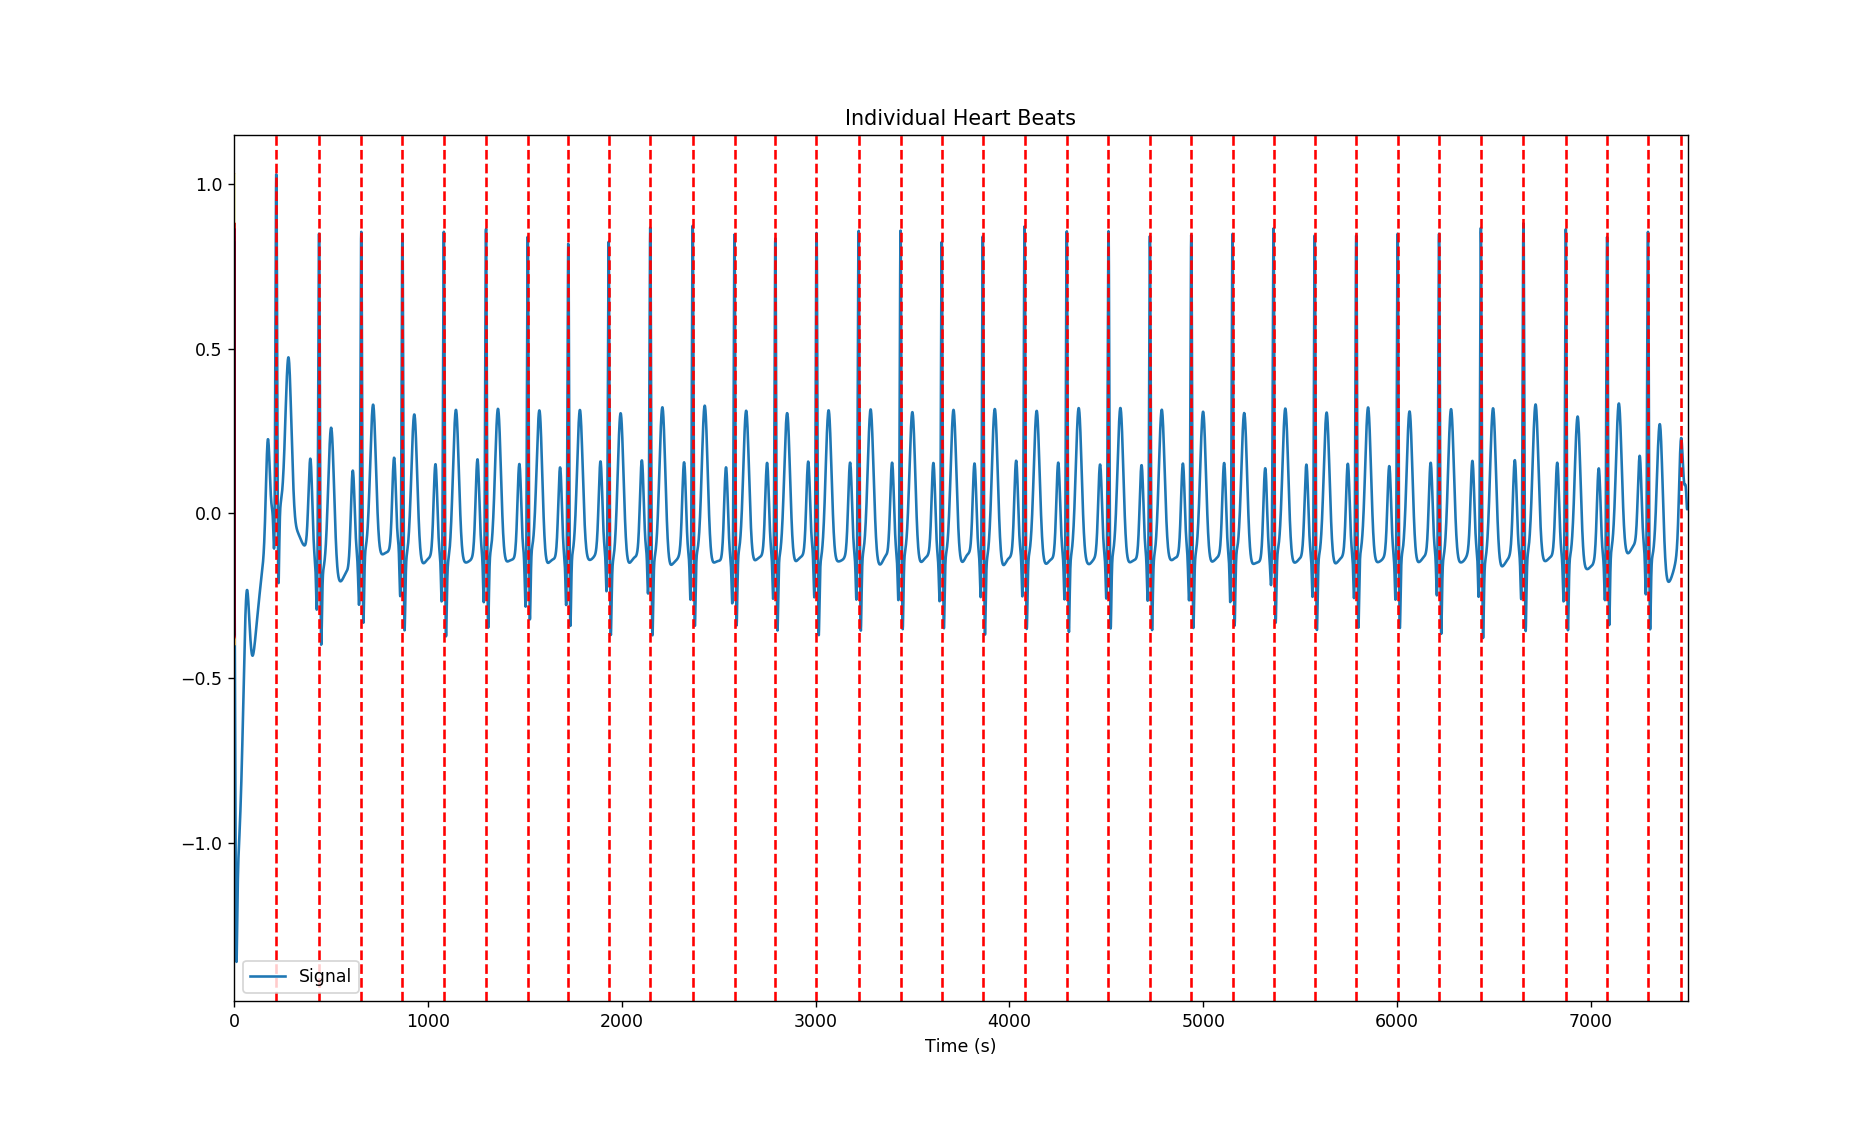

In [22]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)


Once that we know where the R-peaks are located, we can create windows of signal around them (of a length of for instance 1 second, ranging from 400 ms before the R-peak), which we can refer to as *epochs*.


## Segment the signal around the heart beats


You can now epoch all these individual heart beats, synchronized by their R peaks with the [ecg_segment()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_segment) function.


In [23]:
# Plotting all the heart beats
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=250, show=True)


This create a dictionary of dataframes for each 'epoch' (in this case, each heart beat).
    

## Advanced Plotting

This section is written for a more advanced purpose of plotting and visualizing all the heartbeats segments. The code below uses packages other than *NeuroKit2* to manually set the colour gradient of the signals and to create a more interactive experience for the user - by hovering your cursor over each signal, an annotation of the signal corresponding to the heart beat index is shown.

### Custom colors and legend

Here, we define a function to create the epochs. It takes in `cleaned` as the cleaned signal dataframe, and `peaks` as the array of R-peaks locations.

In [29]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]  # resize

# Define a function to create epochs
def plot_heartbeats(cleaned, peaks, sampling_rate=None): 
    heartbeats = nk.epochs_create(cleaned, events=peaks, epochs_start=-0.3, epochs_end=0.4, sampling_rate=sampling_rate)
    heartbeats = nk.epochs_to_df(heartbeats)
    return heartbeats
heartbeats = plot_heartbeats(cleaned_ecg, peaks=rpeaks, sampling_rate=250)
heartbeats.head()

,Signal,Index,Label,Time
0,-0.188295,141,1,-0.300000
1,-0.182860,142,1,-0.295977
2,-0.177281,143,1,-0.291954
3,-0.171530,144,1,-0.287931
4,-0.165576,145,1,-0.283908


We then pivot the dataframe so that each column corresponds to the signal values of one channel, or *Label*.

In [30]:
heartbeats_pivoted = heartbeats.pivot(index='Time', columns='Label', values='Signal')
heartbeats_pivoted.head()

Label,1,10,11,12,13,14,15,16,17,18,...,32,33,34,35,4,5,6,7,8,9
Time,,,,,,,,,,,,,,,,,,,,,
-0.300000,-0.188295,-0.130393,-0.133485,-0.142082,-0.129604,-0.128826,-0.134212,-0.126986,-0.128488,-0.122148,...,-0.129433,-0.155517,-0.097891,-0.186199,-0.115438,-0.133537,-0.136313,-0.137583,-0.137964,-0.129776
-0.295977,-0.182860,-0.129565,-0.132160,-0.141467,-0.128912,-0.128071,-0.132954,-0.125978,-0.127522,-0.121446,...,-0.128514,-0.154457,-0.096876,-0.190515,-0.114778,-0.132642,-0.134961,-0.136883,-0.137485,-0.128841
-0.291954,-0.177281,-0.128556,-0.130639,-0.140687,-0.128097,-0.127219,-0.131499,-0.124859,-0.126416,-0.120663,...,-0.127415,-0.153226,-0.095801,-0.194216,-0.113998,-0.131618,-0.133385,-0.136045,-0.136902,-0.127814
-0.287931,-0.171530,-0.127327,-0.128864,-0.139683,-0.127114,-0.126234,-0.129797,-0.123588,-0.125143,-0.119759,...,-0.126073,-0.151793,-0.094629,-0.197353,-0.113073,-0.130441,-0.131522,-0.135024,-0.136184,-0.126646
-0.283908,-0.165576,-0.125839,-0.126767,-0.138381,-0.125906,-0.125059,-0.127774,-0.122108,-0.123664,-0.118693,...,-0.124416,-0.150128,-0.093312,-0.199973,-0.111967,-0.129071,-0.129285,-0.133753,-0.135299,-0.125278


<IPython.core.display.Javascript object>


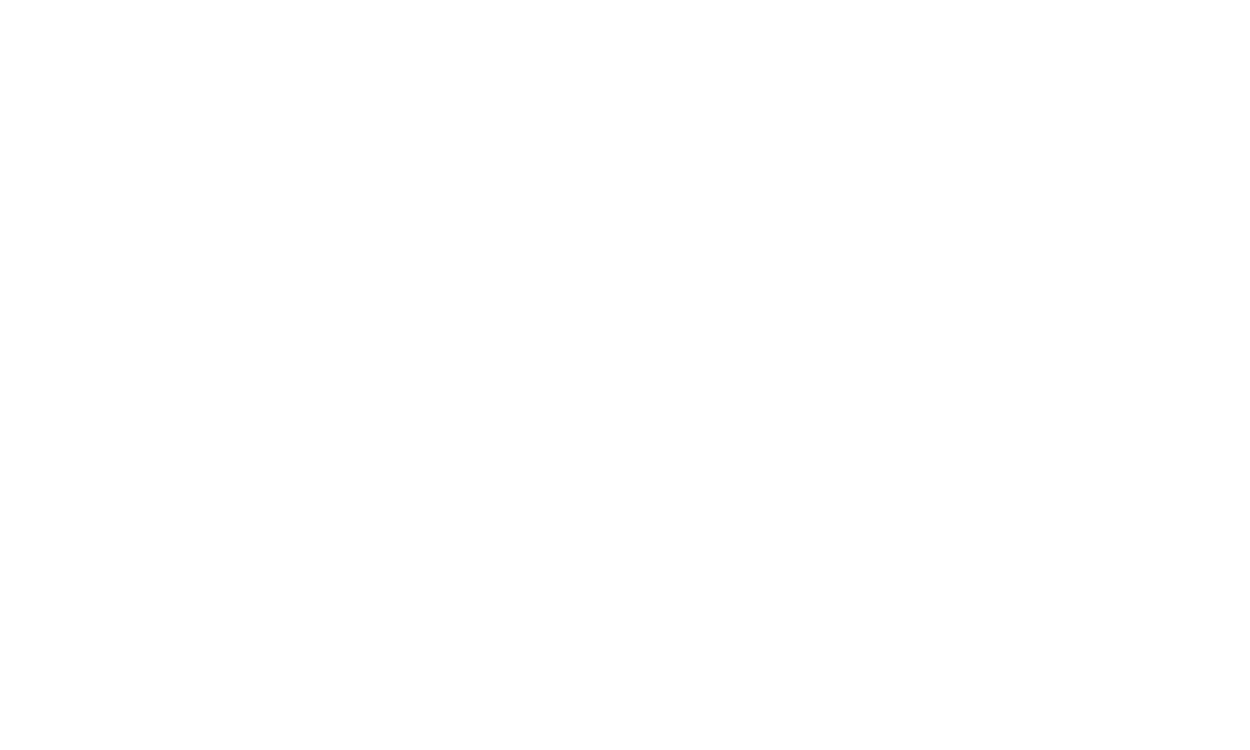

<IPython.core.display.Javascript object>


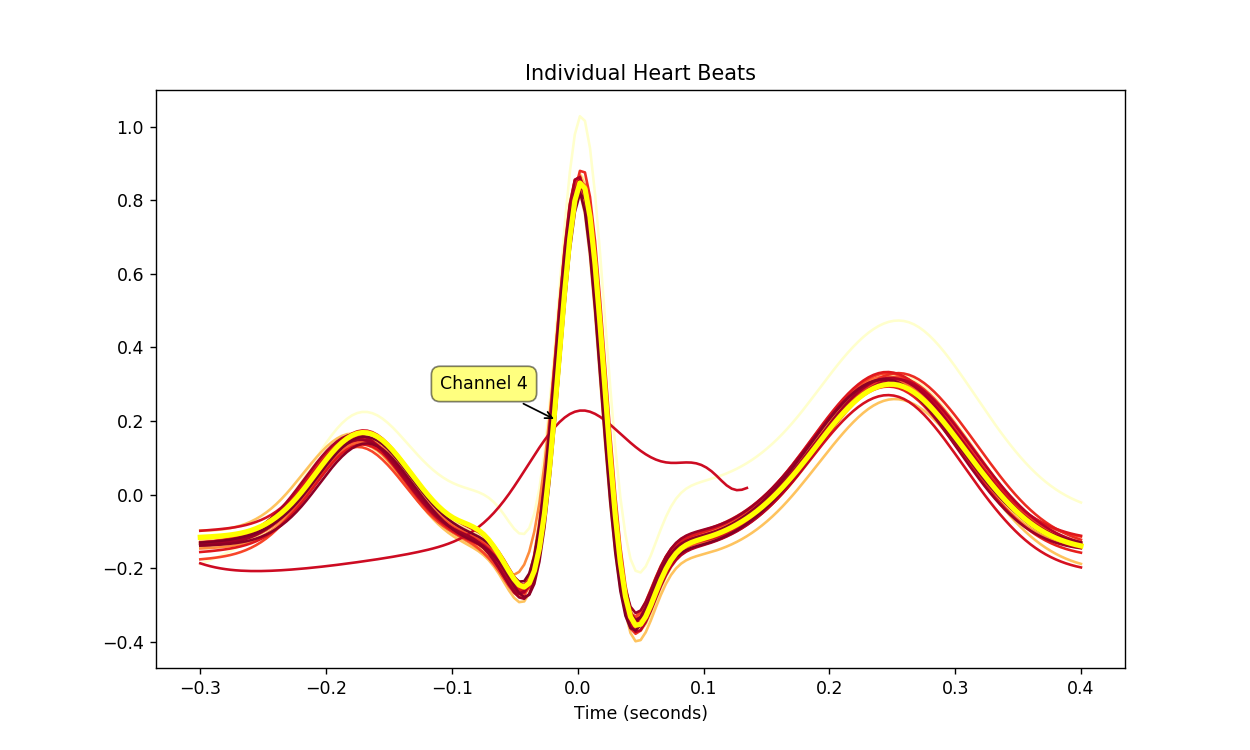

In [31]:
# Import dependencies
import matplotlib.pyplot as plt

# Prepare figure
fig, ax = plt.subplots()
plt.close(fig)
ax.set_title("Individual Heart Beats")
ax.set_xlabel("Time (seconds)")

# Aesthetics
labels = list(heartbeats_pivoted)
labels = ['Channel ' + x for x in labels] # Set labels for each signal
cmap = iter(plt.cm.YlOrRd(np.linspace(0,1, int(heartbeats["Label"].nunique())))) # Get color map
lines = [] # Create empty list to contain the plot of each signal

for i, x, color in zip(labels, heartbeats_pivoted, cmap):
    line, = ax.plot(heartbeats_pivoted[x], label='%s' % i, color=color)
    lines.append(line)

# Show figure
fig

### Interactivity

This section of the code incorporates the aesthetics and interactivity of the plot produced. Unfortunately, the interactivity is not active in this example but it should work in your console! As you hover your cursor over each signal, annotation of the channel that produced it is shown. The below figure that you see is a standstill image.

*Note: you need to install the `mplcursors` package for the interactive part (`pip install mplcursors`)*

In [32]:
# Import packages
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import mplcursors

<IPython.core.display.Javascript object>


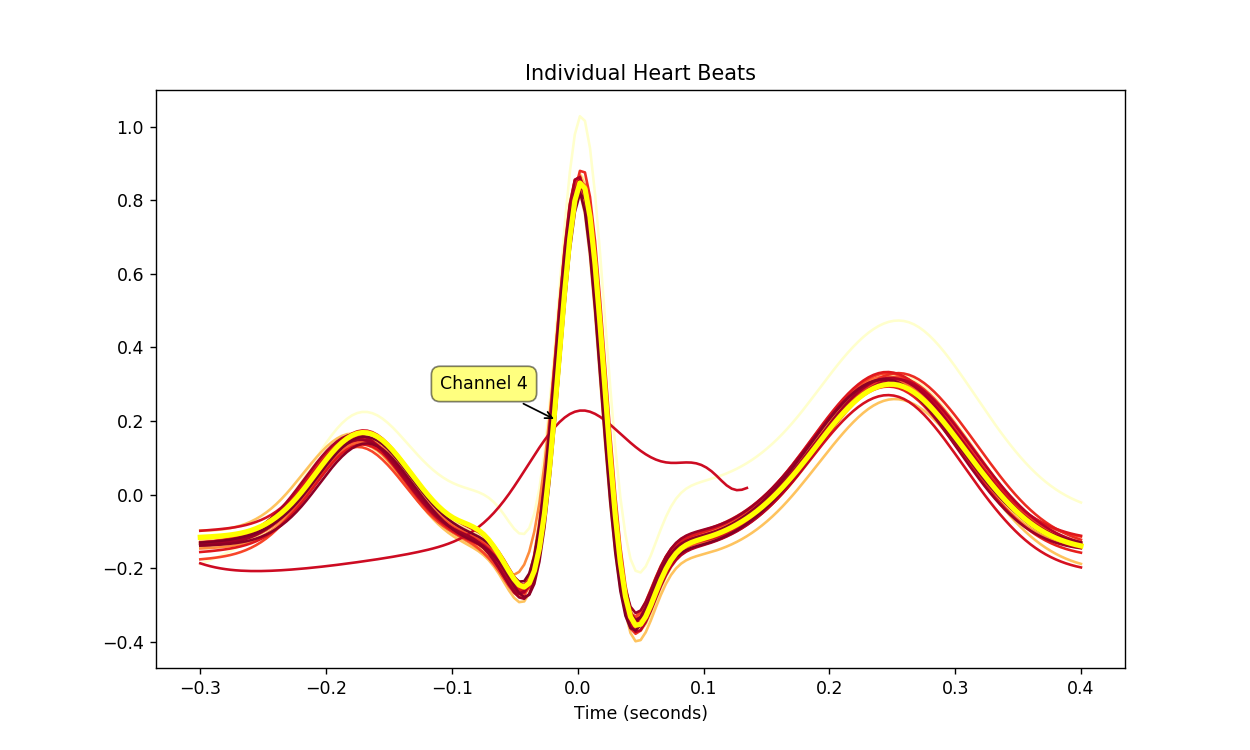

In [33]:
# Obtain hover cursor
mplcursors.cursor(lines, hover=True, highlight=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label())) 
# Return figure
fig